# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Gatot Nugroho
- Email: nugroho.gatot04@gmail.com
- Id Dicoding: nugroho_gatot04

## Menentukan Pertanyaan Bisnis

1. Bagaimana analisa tren Order atas Lima kategori produk english teratas yang diminati pasar tiap tahunnya ?
2. Tentukan 5 Seller Terbaik tingkat nasional berdasarkan Qty Order Item dan bagaimana korelasi dengan pertanyaan pada soal nomor 1 ?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv("/content/drive/MyDrive/Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
sellers_df = pd.read_csv("/content/drive/MyDrive/Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
products_df = pd.read_csv("/content/drive/MyDrive/Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
product_category_name_translation_df = pd.read_csv("/content/drive/MyDrive/Dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
orders_df = pd.read_csv("/content/drive/MyDrive/Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_items_df = pd.read_csv("/content/drive/MyDrive/Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Cleaning Data

In [ ]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [ ]:
products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)

In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df.product_name_lenght.value_counts()

60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: product_name_lenght, Length: 66, dtype: int64

In [ ]:
products_df.product_name_lenght.fillna(value="2182", inplace=True)

In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df.product_description_lenght.value_counts()

404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2795.0     1
2308.0     1
3698.0     1
3522.0     1
2207.0     1
Name: product_description_lenght, Length: 2960, dtype: int64

In [ ]:
products_df.product_description_lenght.fillna(value="94", inplace=True)

In [ ]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght      0
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df.product_photos_qty.value_counts()

1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: product_photos_qty, dtype: int64

In [ ]:
products_df.product_photos_qty.fillna(value="16489", inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [ ]:
products_df.product_weight_g.value_counts()

200.0     2084
300.0     1561
150.0     1259
400.0     1206
100.0     1188
          ... 
6075.0       1
822.0        1
631.0        1
2925.0       1
1920.0       1
Name: product_weight_g, Length: 2204, dtype: int64

In [ ]:
products_df.product_weight_g.fillna(value="2084", inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [ ]:
products_df.product_length_cm.value_counts()

16.0    5520
20.0    2816
30.0    2029
18.0    1502
25.0    1387
        ... 
96.0       4
10.0       3
8.0        2
9.0        2
7.0        1
Name: product_length_cm, Length: 99, dtype: int64

In [ ]:
products_df.product_length_cm.fillna(value="5520", inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             2
product_width_cm              2
dtype: int64

In [ ]:
products_df.product_height_cm.value_counts()

10.0    2548
15.0    2022
20.0    1991
16.0    1595
11.0    1551
        ... 
98.0       2
97.0       2
99.0       1
89.0       1
94.0       1
Name: product_height_cm, Length: 102, dtype: int64

In [ ]:
products_df.product_height_cm.fillna(value="2548", inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              2
dtype: int64

In [ ]:
products_df.product_width_cm.value_counts()

11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
103.0       1
86.0        1
98.0        1
87.0        1
104.0       1
Name: product_width_cm, Length: 95, dtype: int64

In [ ]:
products_df.product_width_cm.fillna(value="3718", inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
new_record = pd.DataFrame([{'product_category_name':'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english':'small_appliances_home_oven_and_coffee'},{'product_category_name':'pc_gamer', 'product_category_name_english':'computers'}])
product_category_name_translation_df = pd.concat([product_category_name_translation_df, new_record], ignore_index=True)

In [ ]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [ ]:
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [ ]:
orders_df.order_approved_at.fillna(value="2018-02-27 04:31:10", inplace=True)
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders_df.order_delivered_carrier_date.value_counts()

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: order_delivered_carrier_date, Length: 81018, dtype: int64

In [ ]:
orders_df.order_delivered_carrier_date.fillna(value="2018-05-09 15:48:00", inplace=True)
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders_df.order_delivered_customer_date.value_counts()

2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: order_delivered_customer_date, Length: 95664, dtype: int64

In [ ]:
orders_df.order_delivered_customer_date.fillna(value="2018-05-08 23:38:46", inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore customers_df

In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [ ]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

### Explore sellers_df

In [ ]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [ ]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [ ]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [ ]:
sellers_df.seller_id.duplicated

<bound method Series.duplicated of 0       3442f8959a84dea7ee197c632cb2df15
1       d1b65fc7debc3361ea86b5f14c68d2e2
2       ce3ad9de960102d0677a81f5d0bb7b2d
3       c0f3eea2e14555b6faeea3dd58c1b1c3
4       51a04a8a6bdcb23deccc82b0b80742cf
                      ...               
3090    98dddbc4601dd4443ca174359b237166
3091    f8201cab383e484733266d1906e2fdfa
3092    74871d19219c7d518d0090283e03c137
3093    e603cf3fec55f8697c9059638d6c8eb5
3094    9e25199f6ef7e7c347120ff175652c3b
Name: seller_id, Length: 3095, dtype: object>

### Explore products_dataset_df

In [ ]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,94,1.0,200.0,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [ ]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3639
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

In [ ]:
products_df.product_id.duplicated

<bound method Series.duplicated of 0        1e9e8ef04dbcff4541ed26657ea517e5
1        3aa071139cb16b67ca9e5dea641aaa2f
2        96bd76ec8810374ed1b65e291975717f
3        cef67bcfe19066a932b7673e239eb23d
4        9dc1a7de274444849c219cff195d0b71
                       ...               
32946    a0b7d5a992ccda646f2d34e418fff5a0
32947    bf4538d88321d0fd4412a93c974510e6
32948    9a7c6041fa9592d9d9ef6cfe62a71f8c
32949    83808703fc0706a22e264b9d75f04a2e
32950    106392145fca363410d287a815be6de4
Name: product_id, Length: 32951, dtype: object>

### Explore product_category_name_translation_df

In [ ]:
product_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,73,73
unique,73,71
top,beleza_saude,small_appliances_home_oven_and_coffee
freq,1,2


In [ ]:
product_category_name_translation_df.product_category_name.duplicated

<bound method Series.duplicated of 0                                      beleza_saude
1                            informatica_acessorios
2                                        automotivo
3                                   cama_mesa_banho
4                                  moveis_decoracao
                          ...                      
68                                  fraldas_higiene
69                    fashion_roupa_infanto_juvenil
70                               seguros_e_servicos
71    portateis_cozinha_e_preparadores_de_alimentos
72                                         pc_gamer
Name: product_category_name, Length: 73, dtype: object>

### Explore orders_df

In [ ]:
orders_df.describe(include="all")

<ipython-input-73-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-73-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-73-903538279252>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-73-903538279252>:1: FutureWarni

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,169,1830,2968,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [ ]:
orders_df.groupby(by="customer_id").order_id.nunique().sort_values(ascending=True)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
aa72002446dfbac0691304465c1b982d    1
aa71b21388b99444414a772acde9f6aa    1
aa6ee75a5950e07fa3f543bf48ee608e    1
aa6edca5d83d4c8e9a2262b9847febd6    1
                                   ..
558de2f6863bf7588338479d614522a3    1
558db91121d704e92ef88de10aa722fd    1
558db5ecbdc2c47fa8b3f8ae3b8a0453    1
559f9d302aa523b2dd718e956f248db5    1
ffffe8b65bbe3087b653a978c870db99    1
Name: order_id, Length: 99441, dtype: int64

In [ ]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=True)

order_status
approved           2
created            5
processing       301
invoiced         314
unavailable      609
canceled         625
shipped         1107
delivered      96478
Name: order_id, dtype: int64

### Explore order_items_df

In [ ]:
order_items_df.describe(include="all")

<ipython-input-76-1623112fb46c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [ ]:

order_items_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


<Axes: >

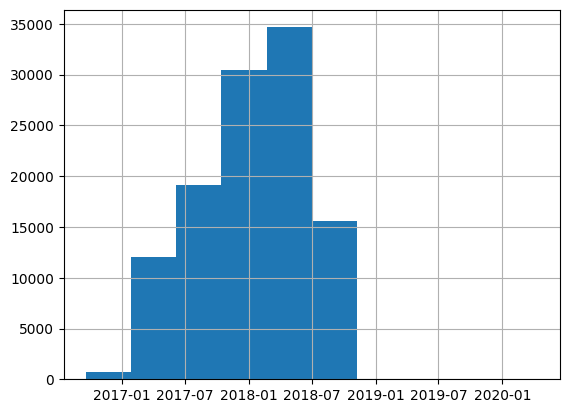

In [ ]:
order_items_df.shipping_limit_date.hist()

In [ ]:
order_items_df.groupby(by="product_id").order_item_id.nunique().sort_values(ascending=False)

product_id
9571759451b1d780ee7c15012ea109d4    20
ee3d532c8a438679776d222e997606b3    20
89b190a046022486c635022524a974a8    15
37eb69aca8718e843d897aa7b82f462d    15
422879e10f46682990de24d770e7f83d    14
                                    ..
5c9f86c0e642b62c2100fd8d26f38771     1
5c9ef6c35fdbad9275157b1929c37fb0     1
5c9d92777b62444d9fbffe92338d9e21     1
5c9d7078a9ba9cfd2f39725146e15678     1
fffe9eeff12fcbd74a2f2b007dde0c58     1
Name: order_item_id, Length: 32951, dtype: int64

In [ ]:
order_items_df.groupby(by="seller_id").order_item_id.nunique().sort_values(ascending=False)

seller_id
2709af9587499e95e803a6498a5a56e9    21
8e6d7754bc7e0f22c96d255ebda59eba    20
ce27a3cc3c8cc1ea79d11e561e9bebb6    20
0b36063d5818f81ccb94b54adfaebbf5    15
f326006815956455b2859abd58fe7e39    15
                                    ..
702835e4b785b67a084280efca355756     1
70126eecc6aa1274392a1743866e9678     1
700f03c207639c22d933381ff60b35c2     1
6fa9202c10491e472dffd59a3e82b2a3     1
ffff564a4f9085cd26170f4732393726     1
Name: order_item_id, Length: 3095, dtype: int64

In [ ]:
order_items_df.groupby(by="price").order_item_id.nunique().sort_values(ascending=False)

price
100.00     20
1.20       20
98.70      20
65.49      15
51.00      15
           ..
29.33       1
131.10      1
131.17      1
29.32       1
6735.00     1
Name: order_item_id, Length: 5968, dtype: int64

### Explore order_items_df & orders_df

In [ ]:
order_details_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id",
)
order_details_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [ ]:
# Data yang digunakan hanya dengan status delivered dan ivoiced

filtered_order_details_df = order_details_df[(order_details_df.order_status == 'invoiced')|(order_details_df.order_status == 'delivered')]
filtered_order_details_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [ ]:
filtered_order_details_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=True)

order_status
invoiced       314
delivered    96478
Name: order_id, dtype: int64

In [ ]:
filtered_order_details_df[filtered_order_details_df.order_item_id.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
65606,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,2018-05-09 15:48:00,2018-05-08 23:38:46,2016-11-25,NaN,NaN,NaN,NaT,NaN,NaN
79688,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,2018-05-09 15:48:00,2018-05-08 23:38:46,2016-11-29,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
filtered_order_details_df.dropna(axis=0, inplace=True)

<ipython-input-86-78c48e40e621>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_order_details_df.dropna(axis=0, inplace=True)


In [ ]:
filtered_order_details_df[filtered_order_details_df.order_item_id.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### Explore order_details_df & sellers_df

In [ ]:

order_detail_sellers_df = pd.merge(
    left=filtered_order_details_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_detail_sellers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,mogi das cruzes,SP


In [ ]:
order_detail_sellers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=True)

order_status
invoiced       312
delivered    96478
Name: order_id, dtype: int64

### Explore order_detail_sellers_df & products_df

In [ ]:
orderdetail_product_sellers_df = pd.merge(
    left=order_detail_sellers_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orderdetail_product_sellers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,belo horizonte,MG,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,mogi das cruzes,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [ ]:
orderdetail_product_sellers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=True)

order_status
invoiced       312
delivered    96478
Name: order_id, dtype: int64

In [ ]:
orderdetail_product_sellers_df[orderdetail_product_sellers_df.order_item_id.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


### Explore orderdetail_product_sellers_df & product_category_name_translation_df

In [ ]:
orderdetail_productenglish_sellers_df = pd.merge(
    left=orderdetail_product_sellers_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
orderdetail_productenglish_sellers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,MG,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [ ]:
orderdetail_productenglish_sellers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=True)

order_status
invoiced       312
delivered    96478
Name: order_id, dtype: int64

### Explore orderdetail_productenglish_sellers_df & customers_df (All Data)

In [ ]:
all_data_df = pd.merge(
    left=orderdetail_productenglish_sellers_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
all_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,1.0,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,1.0,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,3.0,450.0,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,4.0,250.0,51.0,15.0,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
all_data_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=True)

order_status
invoiced       312
delivered    96478
Name: order_id, dtype: int64

In [ ]:
all_data_df.groupby(by="customer_id").order_id.nunique().sort_values(ascending=True).reset_index().head(10)

,customer_id,order_id
0,00012a2ce6f8dcda20d059ce98491703,1
1,aa6436a8b6c5ff6d1354f0a5ebf3169f,1
2,aa62a16b10e3fb24ecdefd7e4dc3fa65,1
3,aa625e70d5e95d9b5c2c24e78fa0d75c,1
4,aa6190994371836fc1d4596edd827abd,1
5,aa606152f23a5fa9ba3d0b87f7a492e8,1
6,aa601b3c45980c0918042d5ca7a25054,1
7,aa5f8aa4c21fe89a04e8d221d4cd8ac1,1
8,aa5f87b79875f43b90b310decb62356e,1
9,aa5f5931b8901ae1ca4b8302f9b94c02,1


In [ ]:
all_data_df.groupby(by="seller_id").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_id,order_id
0,6560211a19b47992c3666cc44a7e94c0,1822
1,4a3ca9315b744ce9f8e9374361493884,1773
2,cc419e0650a3c5ba77189a1882b7556a,1658
3,1f50f920176fa81dab994f9023523100,1399
4,da8622b14eb17ae2831f4ac5b9dab84a,1311
5,955fee9216a65b617aa5c0531780ce60,1263
6,7a67c85e85bb2ce8582c35f2203ad736,1145
7,ea8482cd71df3c1969d7b9473ff13abc,1132
8,4869f7a5dfa277a7dca6462dcf3b52b2,1124
9,3d871de0142ce09b7081e2b9d1733cb1,1064


In [ ]:
all_data_df.groupby(by="product_category_name_english").order_item_id.nunique().sort_values(ascending=False).reset_index().head()

,product_category_name_english,order_item_id
0,health_beauty,21
1,computers_accessories,20
2,auto,20
3,furniture_decor,15
4,garden_tools,15


In [ ]:
all_data_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15097
1,rio de janeiro,6615
2,belo horizonte,2704
3,brasilia,2074
4,curitiba,1495
5,campinas,1407
6,porto alegre,1351
7,salvador,1192
8,guarulhos,1154
9,sao bernardo do campo,915


In [ ]:
all_data_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,40660
1,RJ,12376
2,MG,11393
3,RS,5365
4,PR,4938
5,SC,3557
6,BA,3265
7,DF,2083
8,ES,1999
9,GO,1962


In [ ]:
all_data_df.groupby(by="seller_id").agg({
    "order_id": "nunique"
}).sort_values(by="order_id", ascending=False)

,order_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,1822
4a3ca9315b744ce9f8e9374361493884,1773
cc419e0650a3c5ba77189a1882b7556a,1658
1f50f920176fa81dab994f9023523100,1399
da8622b14eb17ae2831f4ac5b9dab84a,1311
...,...
ce3ad9de960102d0677a81f5d0bb7b2d,1
ce4755084bc097113867e6454f8f5e52,1
5f57db27027655e6c6a391601daa0258,1


In [ ]:
all_data_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique"
}).sort_values(by="product_id", ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3580
sports_leisure,2830
furniture_decor,2598
health_beauty,2408
housewares,2284
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,4


In [ ]:
all_data_df.groupby(by="customer_city").agg({
    "customer_id": "nunique"
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_city,
sao paulo,15097
rio de janeiro,6615
belo horizonte,2704
brasilia,2074
curitiba,1495
...,...
humberto de campos,1
humildes,1
iaras,1


In [ ]:
all_data_df.groupby(by="seller_city").agg({
    "seller_id": "nunique"
}).sort_values(by="seller_id", ascending=False)

,seller_id
seller_city,
sao paulo,664
curitiba,124
rio de janeiro,92
belo horizonte,65
ribeirao preto,50
...,...
jacarei / sao paulo,1
ivoti,1
itirapina,1


In [ ]:
all_data_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city       

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110556 entries, 0 to 110555
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110556 non-null  object        
 1   customer_id                    110556 non-null  object        
 2   order_status                   110556 non-null  object        
 3   order_purchase_timestamp       110556 non-null  datetime64[ns]
 4   order_approved_at              110556 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110556 non-null  datetime64[ns]
 6   order_delivered_customer_date  110556 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110556 non-null  datetime64[ns]
 8   order_item_id                  110556 non-null  float64       
 9   product_id                     110556 non-null  object        
 10  seller_id                      110556 non-null  object        
 11  

In [ ]:
dfexport = pd.DataFrame(all_data_df)
dfexport.to_csv(r'/content/drive/MyDrive/Dataset/alldata_df.csv', index=False)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
 Dup_Rows = all_data_df[all_data_df.duplicated()]
 print("nnDuplicate Rows : n {}".format(Dup_Rows))

nnDuplicate Rows : n Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, seller_zip_code_prefix, seller_city, seller_state, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, product_category_name_english, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []

[0 rows x 30 columns]


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana analisa tren Order atas Lima kategori produk english teratas yang diminati pasar tiap tahunnya ?

In [ ]:
count_order_items_df = all_data_df.groupby(["product_category_name_english"]).order_item_id.count().sort_values(ascending=False).reset_index()
count_order_items_df.head(5)

,product_category_name_english,order_item_id
0,bed_bath_table,12519
1,health_beauty,9501
2,sports_leisure,8463
3,furniture_decor,8174
4,computers_accessories,7681


Fungsi diatas merupakan fungsi yang digunakan untuk mencari 5 Product Category English tertinggi berdasarkan Jumlah Order Item.

In [ ]:
countgroup_order_items_timestamp_df = all_data_df.groupby(["order_purchase_timestamp","order_item_id","order_id","product_category_name_english"]).product_id.count().sort_values(ascending=False).reset_index()
countgroup_order_items_timestamp_df.head()

,order_purchase_timestamp,order_item_id,order_id,product_category_name_english,product_id
0,2016-09-15 12:16:38,1.0,bfbd0f9bdef84302105ad712db648a6c,health_beauty,1
1,2018-03-31 22:21:00,1.0,89cd9f68aa6c5370ba3443f02292f7a3,telephony,1
2,2018-03-31 21:54:28,1.0,0e05c0027e31a0a9cf1074ec1b95c8da,housewares,1
3,2018-03-31 21:54:03,1.0,a3b8577da20bded7d651b76f6de4e2be,stationery,1
4,2018-03-31 21:36:25,1.0,acf86ff3bc3c19b1f61c2b0c04c60d52,furniture_decor,1


Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan Jumlah Order(count) atas product_id yang mana data ini digroup berdasarkan
order_purchase_timestamp, order_item_id, order_id dan product_category_name_english.

In [ ]:
filtered_countgroup_order_items_timestamp_df = countgroup_order_items_timestamp_df[
    (countgroup_order_items_timestamp_df.product_category_name_english == 'bed_bath_table')|
    (countgroup_order_items_timestamp_df.product_category_name_english == 'health_beauty')|
    (countgroup_order_items_timestamp_df.product_category_name_english == 'sports_leisure')|
    (countgroup_order_items_timestamp_df.product_category_name_english == 'furniture_decor')|
    (countgroup_order_items_timestamp_df.product_category_name_english == 'computers_accessories')
    ]
filtered_countgroup_order_items_timestamp_df.head()

,order_purchase_timestamp,order_item_id,order_id,product_category_name_english,product_id
0,2016-09-15 12:16:38,1.0,bfbd0f9bdef84302105ad712db648a6c,health_beauty,1
4,2018-03-31 21:36:25,1.0,acf86ff3bc3c19b1f61c2b0c04c60d52,furniture_decor,1
5,2018-03-31 21:31:43,1.0,3dd45cc3460f14bbe6c2249a8019a450,furniture_decor,1
9,2018-03-31 21:09:19,1.0,bdf9c2bae94a8aed4105d0206d1e77a6,bed_bath_table,1
14,2018-03-31 20:51:18,1.0,b8356f852fca3a72234735d7b7c1c18f,health_beauty,1


Fungsi ini merupakan fungsi yang digunakan untuk menfilter 5 product_category_name_english secara manual guna untuk mempersempit data sesuai kebutuhan.

In [ ]:
group_by_year=filtered_countgroup_order_items_timestamp_df.groupby([pd.Grouper(key="order_purchase_timestamp", freq='Y'),'product_category_name_english']).count()
new_group_by_year=group_by_year.drop(['product_id','order_id'], axis=1)
new_group_by_year.head()

order_item_id
order_purchase_timestamp product_category_name_english               
2016-12-31               bed_bath_table                            10
                         computers_accessories                     21
                         furniture_decor                           65
                         health_beauty                             46
                         sports_leisure                            17

Fungsi ini merupakan fungsi yang digunakan untuk menampilkan jumlah Order Item berdasarkan product_category_name_english yang mana data digroup berdasarkan Tahun Order Purchase (order_purchase_timestamp).

In [ ]:
order_pivot=new_group_by_year.pivot_table(index='order_purchase_timestamp', columns='product_category_name_english', aggfunc='sum')
order_pivot.head()

order_item_id                        \
product_category_name_english bed_bath_table computers_accessories   
order_purchase_timestamp                                             
2016-12-31                                10                    21   
2017-12-31                              6028                  3028   
2018-12-31                              6481                  4632   

                                                                            
product_category_name_english furniture_decor health_beauty sports_leisure  
order_purchase_timestamp                                                    
2016-12-31                                 65            46             17  
2017-12-31                               4055          3603           3990  
2018-12-31                               4054          5852           4456

Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan hasil Pivot Jumlah order Item (order_item_id) berdasarkan Tahun Purchase (order_purchase_timestamp) dan Product Category English (product_category_name_english), yang mana pada fungsi ini Product Category English (product_category_name_english) dirubah menjadi kolom menggunakan fungsi pivot agar pada tahapan visualisasi Line Chart lebih mudah untuk dibaca.

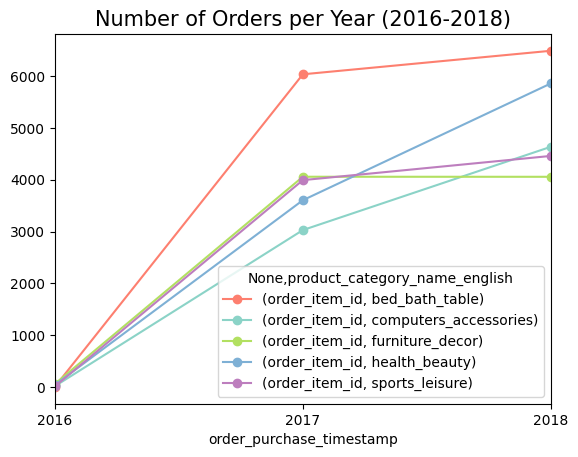

In [ ]:
colors = ('#fd7f6f', '#8bd3c7', '#b2e061', '#7eb0d5', '#bd7ebe')
order_pivot.plot.line(marker='o', color=colors)
plt.title("Number of Orders per Year (2016-2018)", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#https://rpubs.com/dsciencelabs/asd14
#https://dev.to/acnice/sales-trend-analysis-with-pandas-1bcm
#https://pandas.pydata.org/docs/user_guide/visualization.html

Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan Tren 5 Product Category English (product_category_name_english) Tiap Tahun Purchase Order (order_purchase_timestamp) berdasarkan Jumlah Order Item (order_item_id) dalam bentuk Visualisasi berupa Line Chart.

### Pertanyaan 2: Tentukan 5 Seller Terbaik tingkat nasional berdasarkan Qty Order Item dan bagaimana korelasi dengan pertanyaan pada soal 1 ?

In [ ]:
count_orderitems_seller_df = all_data_df.groupby(["seller_id"]).order_item_id.count().sort_values(ascending=False).reset_index()
count_orderitems_seller_df.head(5)

,seller_id,order_item_id
0,6560211a19b47992c3666cc44a7e94c0,1999
1,4a3ca9315b744ce9f8e9374361493884,1950
2,1f50f920176fa81dab994f9023523100,1926
3,cc419e0650a3c5ba77189a1882b7556a,1727
4,da8622b14eb17ae2831f4ac5b9dab84a,1548


Fungsi diatas merupakan fungsi yang digunakan mencari 5 seller terbaik atas dasar Order Item Detail (Order_item_id)

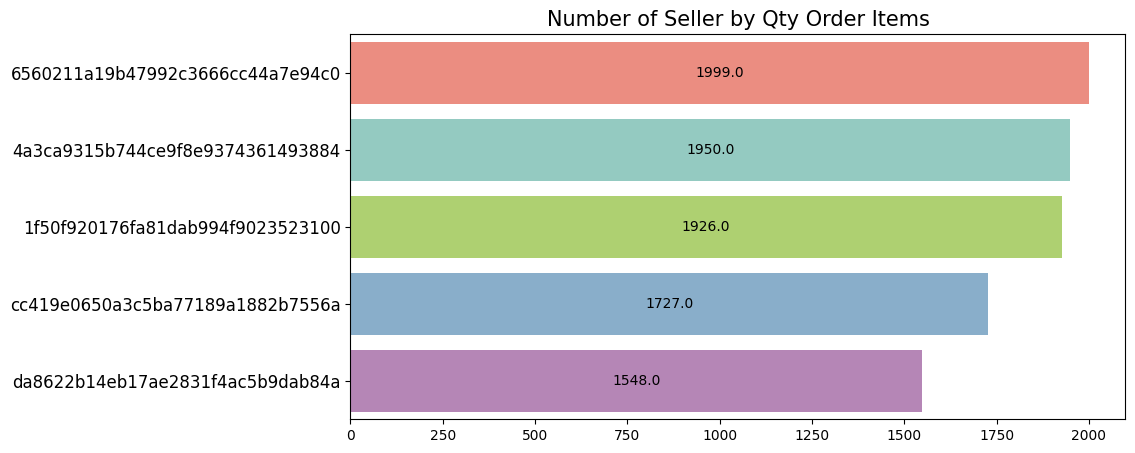

In [ ]:
count_orderitems_seller_df = all_data_df.groupby(["seller_id"]).order_item_id.count().sort_values(ascending=False).reset_index().head(5)
count_orderitems_seller_df.rename(columns={
    "order_item_id": "item_count"
}, inplace=True)
count_orderitems_seller_df
plt.figure(figsize=(10, 5))
colors_ = ['#fd7f6f', '#8bd3c7', '#b2e061', '#7eb0d5', '#bd7ebe']
ax=sns.barplot(
    x="item_count",
    y="seller_id",
    data=count_orderitems_seller_df.sort_values(by="item_count", ascending=False),
    palette=colors_
)
plt.title("Number of Seller by Qty Order Items", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], fmt= '%0.1f', label_type='center' )
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan 5 Seller tertinggi sesuai order item dalam bentuk Visualisasi berupa Bar Chart Horizontal

In [ ]:
count_orderitems_sellercategory_df = all_data_df.groupby(["seller_id", "product_category_name_english"]).order_item_id.count().sort_values(ascending=False).reset_index()
count_orderitems_sellercategory_df.head()

,seller_id,product_category_name_english,order_item_id
0,1f50f920176fa81dab994f9023523100,garden_tools,1877
1,6560211a19b47992c3666cc44a7e94c0,watches_gifts,1597
2,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,1541
3,1025f0e2d44d7041d6cf58b6550e0bfa,furniture_decor,1284
4,da8622b14eb17ae2831f4ac5b9dab84a,bed_bath_table,1274


Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan jumlah data order item berdasarkan seller dan product category name english. Tujuan ini untuk mempersiapkan data awal tentang kolerasi 5 seller tertinggi dengan 5 kategori produk yang diminati pasar.

In [ ]:
filtered_countgroup_orderitems_byseller_df = count_orderitems_sellercategory_df[
    (count_orderitems_sellercategory_df.seller_id == '6560211a19b47992c3666cc44a7e94c0')|
    (count_orderitems_sellercategory_df.seller_id == '4a3ca9315b744ce9f8e9374361493884')|
    (count_orderitems_sellercategory_df.seller_id == '1f50f920176fa81dab994f9023523100')|
    (count_orderitems_sellercategory_df.seller_id == 'cc419e0650a3c5ba77189a1882b7556a')|
    (count_orderitems_sellercategory_df.seller_id == 'da8622b14eb17ae2831f4ac5b9dab84a')
    ]
filtered_countgroup_orderitems_byseller_df.head()

,seller_id,product_category_name_english,order_item_id
0,1f50f920176fa81dab994f9023523100,garden_tools,1877
1,6560211a19b47992c3666cc44a7e94c0,watches_gifts,1597
2,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,1541
4,da8622b14eb17ae2831f4ac5b9dab84a,bed_bath_table,1274
7,cc419e0650a3c5ba77189a1882b7556a,health_beauty,1059


Fungsi diatas merupakan fungsi filter tahap 1, filter ini digunakan untuk menfilter 5 seller tertinggi secara manual dari data awal yaitu count_orderitems_sellercategory_df.

In [ ]:
  filtered_countgroup_orderitems_bycategoryenglish_df = filtered_countgroup_orderitems_byseller_df[
    (filtered_countgroup_orderitems_byseller_df.product_category_name_english == 'bed_bath_table')|
    (filtered_countgroup_orderitems_byseller_df.product_category_name_english == 'health_beauty')|
    (filtered_countgroup_orderitems_byseller_df.product_category_name_english == 'sports_leisure')|
    (filtered_countgroup_orderitems_byseller_df.product_category_name_english == 'furniture_decor')|
    (filtered_countgroup_orderitems_byseller_df.product_category_name_english == 'computers_accessories')
    ]
filtered_countgroup_orderitems_bycategoryenglish_df.head()

,seller_id,product_category_name_english,order_item_id
2,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,1541
4,da8622b14eb17ae2831f4ac5b9dab84a,bed_bath_table,1274
7,cc419e0650a3c5ba77189a1882b7556a,health_beauty,1059
57,da8622b14eb17ae2831f4ac5b9dab84a,health_beauty,270
250,4a3ca9315b744ce9f8e9374361493884,furniture_decor,83


Fungsi diatas merupakan fungsi filter tahap 2, filter ke 2 ini digunakan untuk menfilter 5 product category english terlaris secara manual setelah filter tahap 1 yaitu filtered_countgroup_orderitems_byseller_df.

In [ ]:
group_by_sellercategoryeng=filtered_countgroup_orderitems_bycategoryenglish_df.groupby(['seller_id','product_category_name_english']).sum()
group_by_sellercategoryeng.head(10)

order_item_id
seller_id                        product_category_name_english               
4a3ca9315b744ce9f8e9374361493884 bed_bath_table                          1541
                                 furniture_decor                           83
6560211a19b47992c3666cc44a7e94c0 computers_accessories                     12
                                 sports_leisure                             6
cc419e0650a3c5ba77189a1882b7556a health_beauty                           1059
da8622b14eb17ae2831f4ac5b9dab84a bed_bath_table                          1274
                                 furniture_decor                            1
                                 health_beauty                            270

Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan Jumlah order Item berdasarkan Seller dan Product Category English, yang mana pada fungsi ini lebih dipersempit dimana hanya berisi data yang berelasi antara 5 seller tertinggi dan 5 product category english terlaris.

In [ ]:
count_orderitem_Sellercategory_pivot=group_by_sellercategoryeng.pivot_table(index='product_category_name_english', columns='seller_id', aggfunc='sum')
count_orderitem_Sellercategory_pivot.head()

order_item_id  \
seller_id                     4a3ca9315b744ce9f8e9374361493884   
product_category_name_english                                    
bed_bath_table                                          1541.0   
computers_accessories                                      NaN   
furniture_decor                                           83.0   
health_beauty                                              NaN   
sports_leisure                                             NaN   

                                                                \
seller_id                     6560211a19b47992c3666cc44a7e94c0   
product_category_name_english                                    
bed_bath_table                                             NaN   
computers_accessories                                     12.0   
furniture_decor                                            NaN   
health_beauty                                              NaN   
sports_leisure                                             6.0   

                                                                \
seller_id                     cc419e0650a3c5ba77189a1882b7556a   
product_category_name_english                                    
bed_bath_table                                             NaN   
computers_accessories                                      NaN   
furniture_decor                                            NaN   
health_beauty                                           1059.0   
sports_leisure                                             NaN   

                                                                
seller_id                     da8622b14eb17ae2831f4ac5b9dab84a  
product_category_name_english                                   
bed_bath_table                                          1274.0  
computers_accessories                                      NaN  
furniture_decor                                            1.0  
health_beauty                                            270.0  
sports_leisure                                             NaN

Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan hasil Pivot Jumlah order Item berdasarkan Seller dan Product Category English, yang mana pada fungsi ini seller_id dirubah menjadi kolom menggunakan fungsi pivot agar pada tahapan visualisasi Pie Chart lebih mudah untuk dibaca.

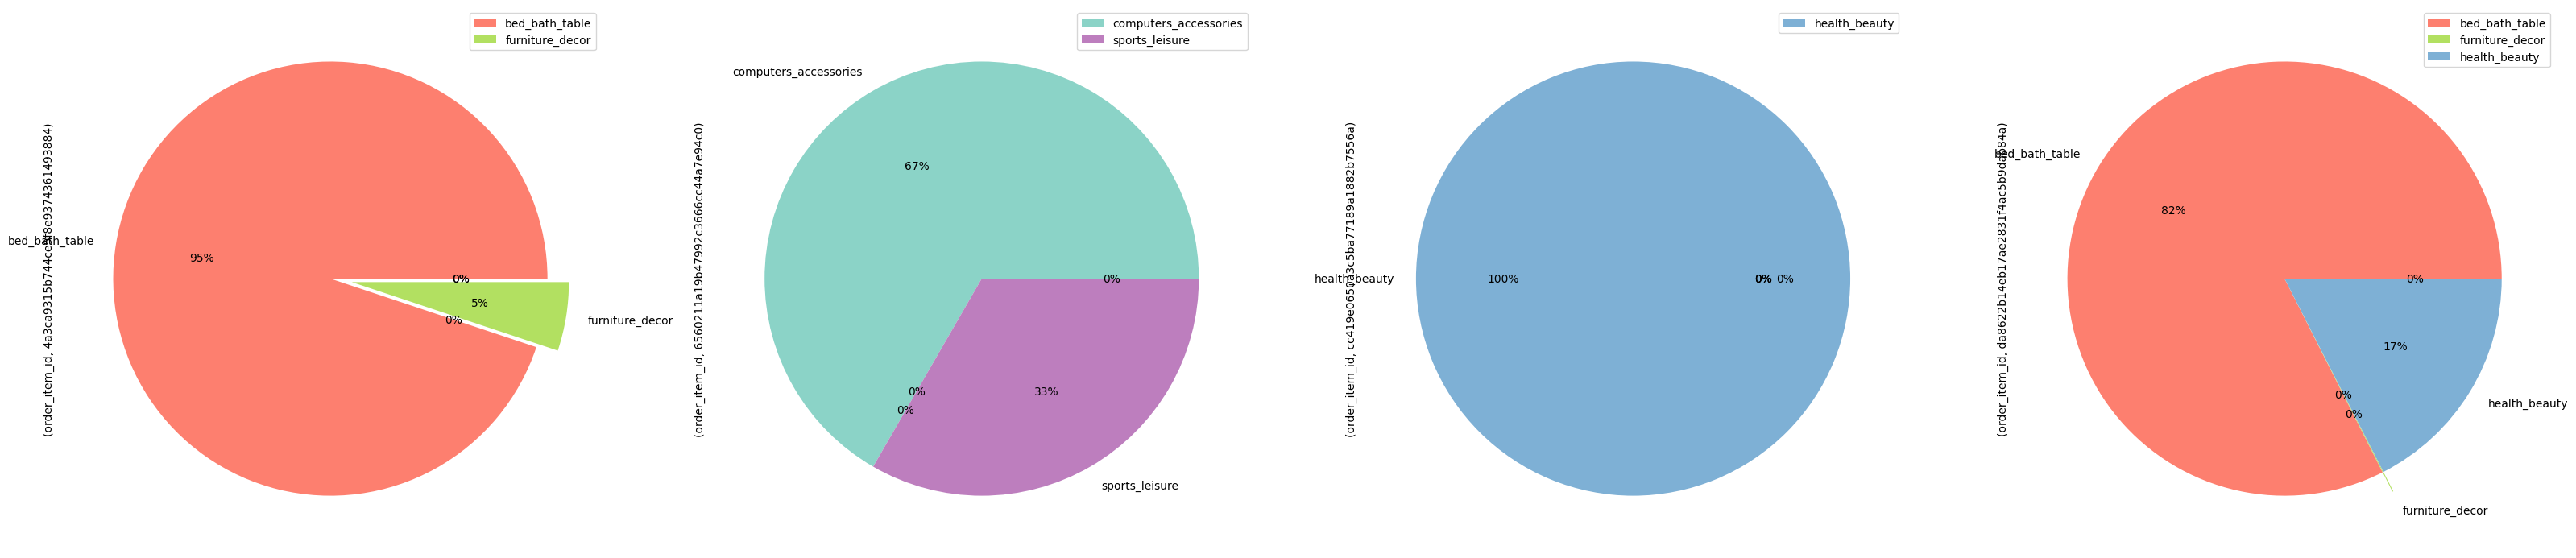

In [ ]:
colors = ('#fd7f6f', '#8bd3c7', '#b2e061', '#7eb0d5', '#bd7ebe')
explode = (0, 0, 0.1, 0, 0)
count_orderitem_Sellercategory_pivot.plot.pie(subplots=True,autopct='%1.0f%%', colors=colors, explode=explode, figsize=(40, 20));

Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan Visualisasi dalam bentuk Pie Chart dimana chart ini berisi penjelasan Jumlah Order Item per masing-masing Seller_id dan detail Product Category English pada masing-masing seller_id. Dimana data yang ditampilkan merupakan relasi antara 5 seller tertinggi dan 5 product category english terlaris.

### RFM Analysis 5 Seller Terbaik berdasarkan Qty Order Items

In [ ]:
rfm_df = all_data_df.groupby(by="seller_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah penjualan yang dihasilkan
})
rfm_df.columns = ["seller_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir seller melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_data_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,seller_id,frequency,monetary,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00,315
1,001cca7ae9ae17fb1caed9dfb1094831,195,24487.03,48
2,002100f778ceb8431b7a1020ff7ab48f,50,1216.60,139
3,003554e2dce176b5555353e4f3555ac8,1,120.00,257
4,004c9cd9d87a3c30c522c48c4fc07416,156,19569.73,118


Fungsi diatas merupakan fungsi yang digunakan untuk melakukan segmentasi semua seller (mengelompokkan seller ke dalam beberapa kategori) berdasarkan tiga parameter yaitu recency, frequency, dan monetary.

In [ ]:
rfm_five_bestseller_df= rfm_df[
    (rfm_df.seller_id == '6560211a19b47992c3666cc44a7e94c0')|
    (rfm_df.seller_id == '4a3ca9315b744ce9f8e9374361493884')|
    (rfm_df.seller_id == '1f50f920176fa81dab994f9023523100')|
    (rfm_df.seller_id == 'cc419e0650a3c5ba77189a1882b7556a')|
    (rfm_df.seller_id == 'da8622b14eb17ae2831f4ac5b9dab84a')
    ]
rfm_five_bestseller_df.head()

,seller_id,frequency,monetary,recency
359,1f50f920176fa81dab994f9023523100,1399,106655.71,4
860,4a3ca9315b744ce9f8e9374361493884,1773,196972.02,2
1195,6560211a19b47992c3666cc44a7e94c0,1822,120954.83,0
2394,cc419e0650a3c5ba77189a1882b7556a,1658,101463.90,2
2549,da8622b14eb17ae2831f4ac5b9dab84a,1311,159816.87,1


Fungsi diatas merupakan fungsi yang digunakan untuk menfilter Segmentasi Seller yaitu 5 Seller terbaik berdasarkan Qty Order Items secara manual.

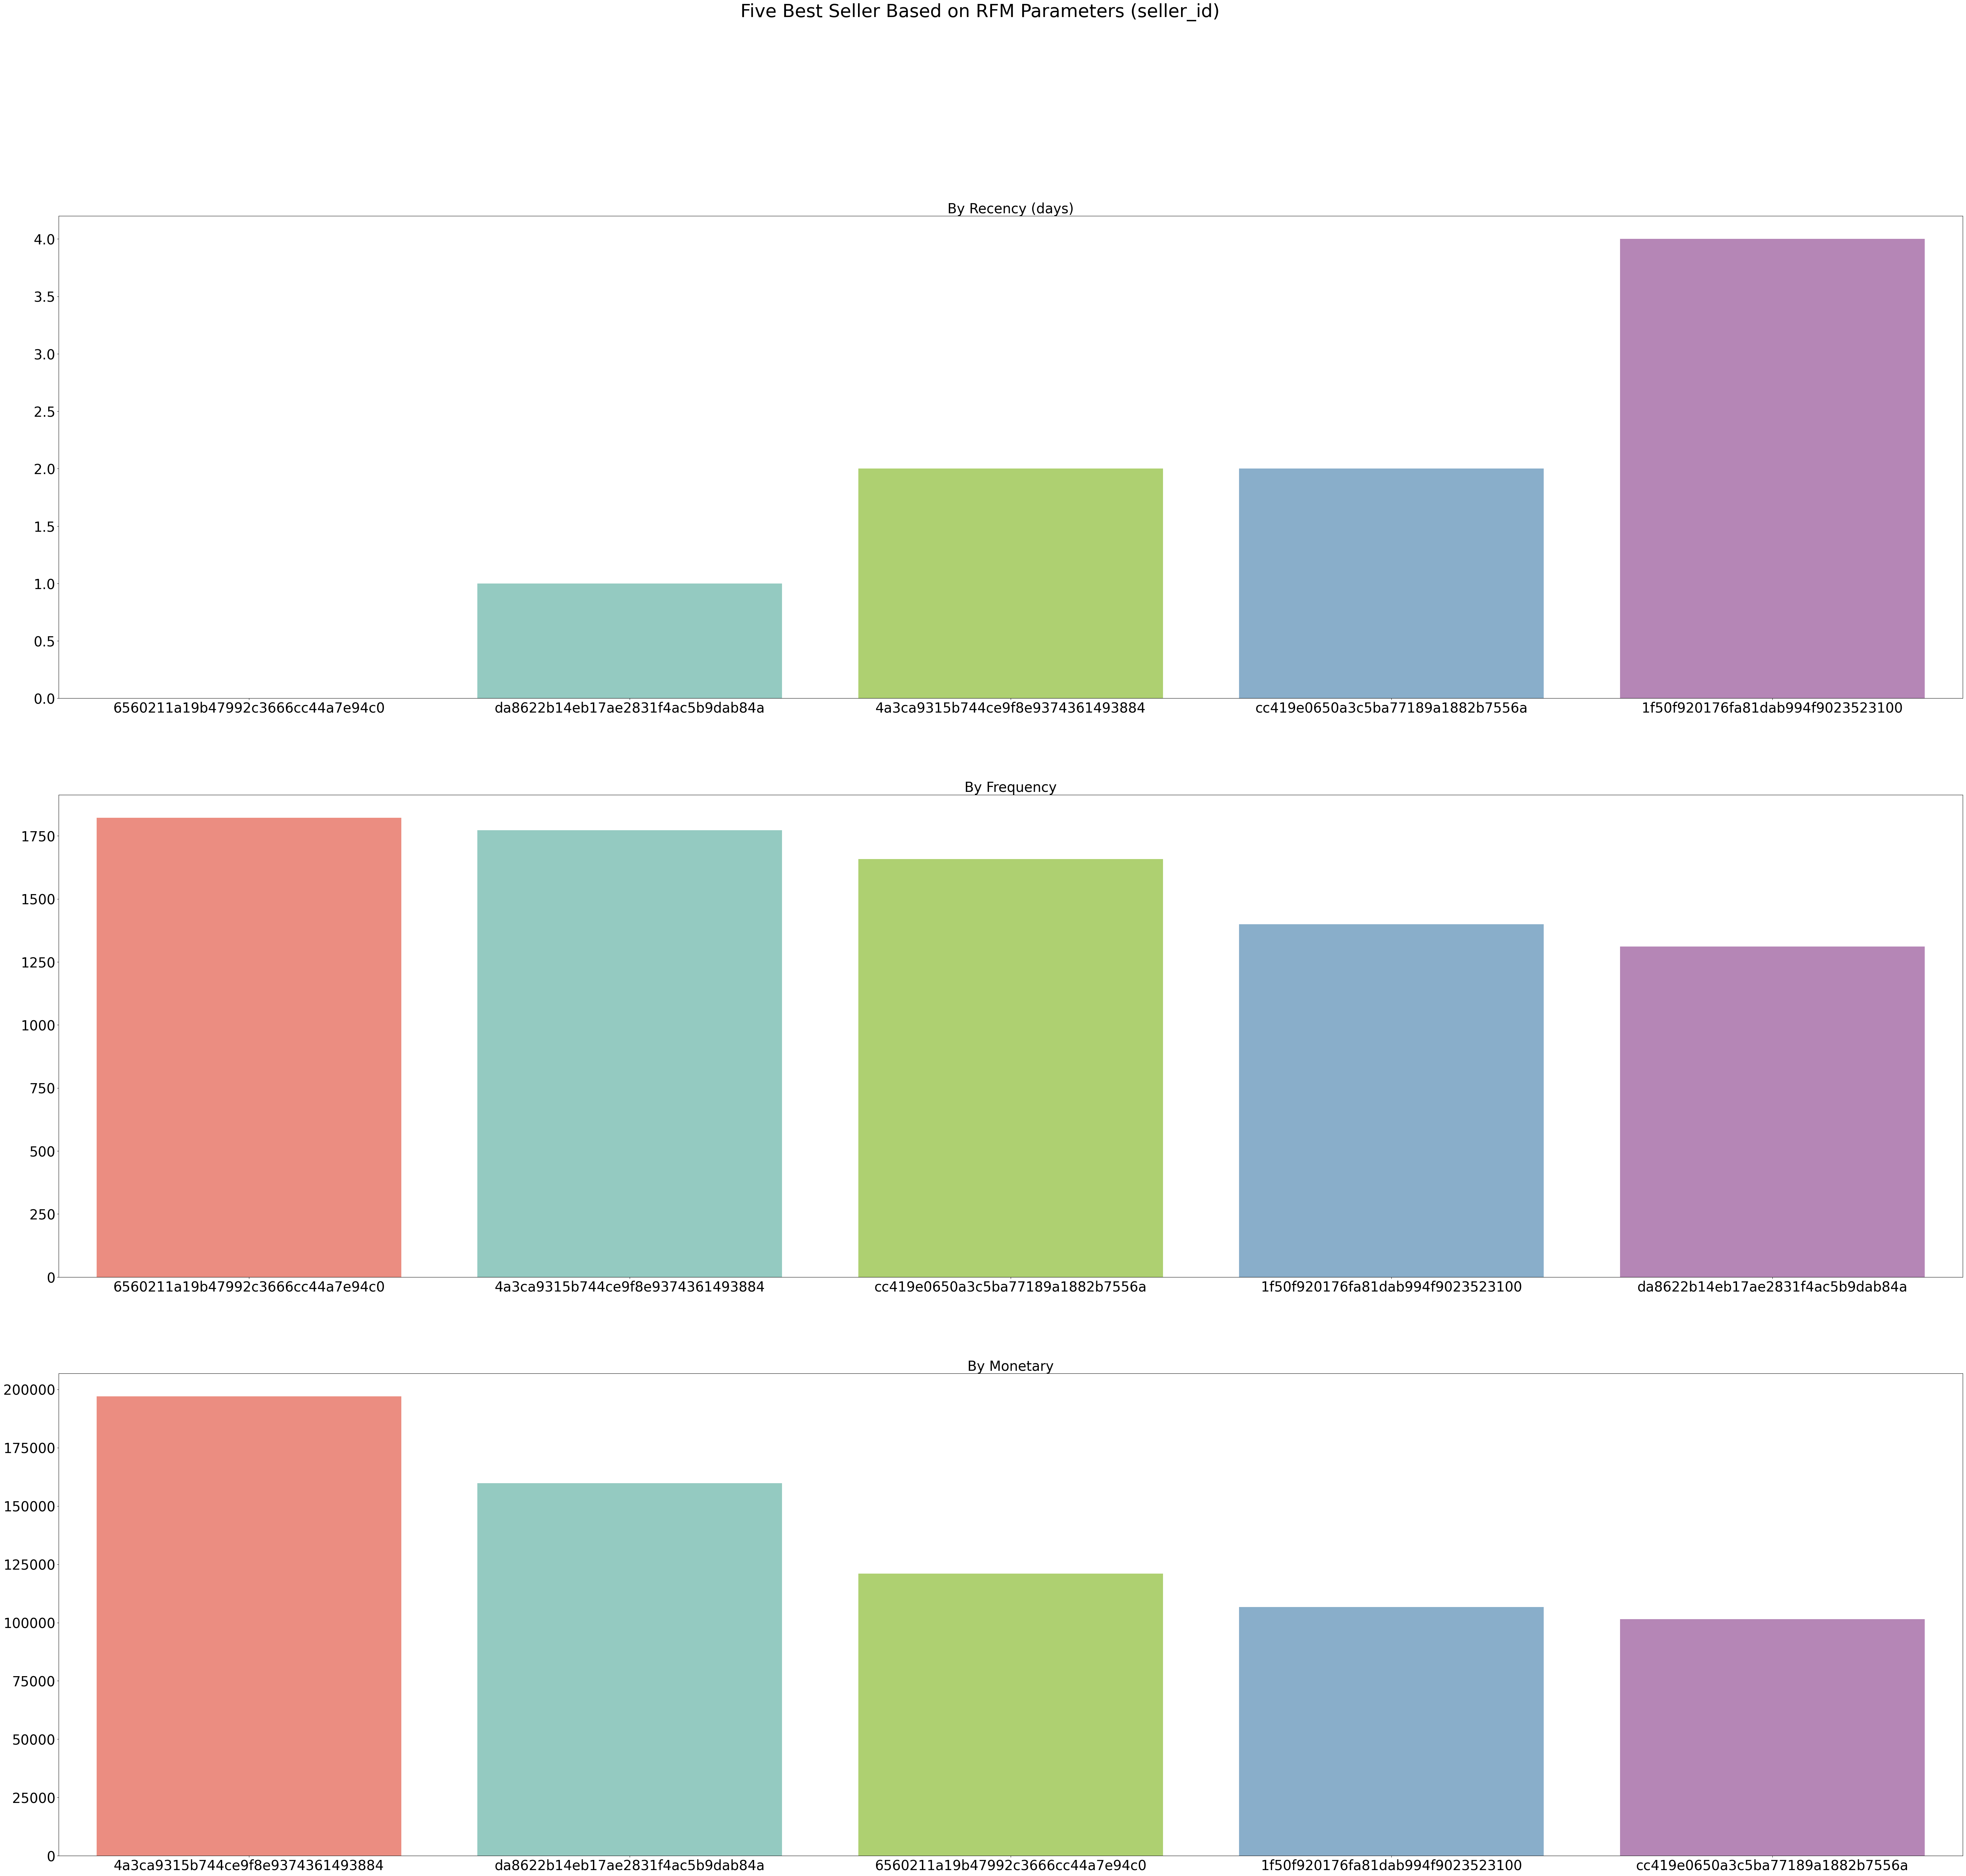

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(75, 65))
colors = ('#fd7f6f', '#8bd3c7', '#b2e061', '#7eb0d5', '#bd7ebe')

sns.barplot(y="recency", x="seller_id", data=rfm_five_bestseller_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=30)
ax[0].tick_params(axis ='y', labelsize=30)
ax[0].tick_params(axis ='x', labelsize=30)

sns.barplot(y="frequency", x="seller_id", data=rfm_five_bestseller_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=30)
ax[1].tick_params(axis ='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=30)

sns.barplot(y="monetary", x="seller_id", data=rfm_five_bestseller_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=30)
ax[2].tick_params(axis ='y', labelsize=30)
ax[2].tick_params(axis='x', labelsize=30)

plt.suptitle("Five Best Seller Based on RFM Parameters (seller_id)", fontsize=40)
plt.show()

Fungsi diatas merupakan fungsi yang digunakan untuk menampilkan Visualisasi 5 Seller terbaik berdasarkan Qty Order Items yang dilihat dari ketiga kategori paramater RFM yaitu recency, frequency, dan monetary.

## Conclusion



1.   Conclusion : Bagaimana analisa tren Order atas Lima kategori produk english teratas yang diminati pasar tiap tahunnya ?


  *   Dari analisa yang dilakukan dapat diketahui bahwa 5 Kategori produk yang diminati pasar berdasarkan Qty Order Items adalah bed_bath_table, computers_accessories, furniture_decor, health_beauty dan sports_leisure.  
  *   Dari Visualisasi tren qty order tiap tahunnya dapat dijelaskn sbb :
        *   bed_bath_table = Tiap tahunnya cenderung naik, tahun pertama ke tahun kedua kenaikannya cukup signifikan dan tahun kedua ke tahun ketiga kenaikan tidak terlalu banyak (+/-) 7% dari qty tahun kedua.
        *   computers_accessories = Tiap tahunnya cenderung naik, tahun pertama ke tahun kedua kenaikannya cukup signifikan dan tahun kedua ke tahun ketiga kenaikan cukup banyak (+/-) 52% dari qty tahun kedua.
        *   furniture_decor = Tiap tahunnya cenderung naik, tahun pertama ke tahun kedua kenaikannya cukup signifikan dan tahun kedua ke tahun ketiga mengalami penurunan sangat sedikit (+/-) 0.0002% dari qty tahun kedua (hanya 1 unit).
        *   health_beauty = Tiap tahunnya cenderung naik, tahun pertama ke tahun kedua kenaikannya cukup signifikan dan tahun kedua ke tahun ketiga kenaikan cukup banyak (+/-) 62% dari qty tahun kedua.
        *   sports_leisure = Tiap tahunnya cenderung naik, tahun pertama ke tahun kedua kenaikannya cukup signifikan dan tahun kedua ke tahun ketiga kenaikan tidak terlalu banyak (+/-) 11% dari qty tahun kedua.
        
  *   Umumnya Data dari hasil analisa ini digunakan untuk mengetahui tingkat kebutuhan customer terhadap sebuah produk, sehingga company E-Commerce dapat memilah dan memilih Calon seller / penjual produk-produk dengan kategori tersebut yang akan diprioritaskan (salah satu parameter calon seller di Approve sebagai seller resmi E-Commerce). Selain itu dapat digunakan untuk meningkatkan kuantitas penjualan terhadap kebutuhan pasar yang sedang meningkat dg parameter kategori produk yang lagi trending. Analisa ini juga dapat digunakan untuk parameter Iklan yang dapat dilihat dari kategori-kategori produk yang diminati oleh pasar.

---

2.   Conclusion : Tentukan 5 Seller Terbaik tingkat nasional berdasarkan Qty Order Item dan bagaimana korelasi dengan pertanyaan pada soal nomor 1 ?


  *   Dari analisa yang dilakukan dapat diketahui bahwa 5 seller terbaik nasional berdasarkan Qty Order Items adalah :
      *   6560211a19b47992c3666cc44a7e94c0
      *   4a3ca9315b744ce9f8e9374361493884
      *   1f50f920176fa81dab994f9023523100
      *   cc419e0650a3c5ba77189a1882b7556a
      *   da8622b14eb17ae2831f4ac5b9dab84a

  *   Dari analisa yang dilakukan dapat dijelaskan korelasi antara 5 seller terbaik dengan 5 kategori produk tertinggi berdasarkan Qty Order Item adalah sebagai berikut :
      *   Untuk Seller dengan id = 6560211a19b47992c3666cc44a7e94c0, dapat dilihat dari 5 kategori produk english tertinggi terdapat 2 kategori yang dijual yaitu computers_accessories dengan nilai 12 unit dan sports_leisure dengan nilai 6 unit.
      *   Untuk Seller dengan id = 4a3ca9315b744ce9f8e9374361493884, dapat dilihat dari 5 kategori produk english tertinggi terdapat 2 kategori yang dijual yaitu bed_bath_table dengan nilai 1,541 unit dan furniture_decor dengan nilai 83 unit.
      *   Untuk Seller dengan id = 1f50f920176fa81dab994f9023523100, dapat dilihat dari 5 kategori produk english tertinggi tidak terdapat satu pun yang dijual oleh seller ini.
      *   Untuk Seller dengan id = cc419e0650a3c5ba77189a1882b7556a, dapat dilihat dari 5 kategori produk english tertinggi terdapat 1 kategori yang dijual yaitu health_beauty dengan nilai 1,059 unit.
      *   da8622b14eb17ae2831f4ac5b9dab84a, dapat dilihat dari 5 kategori produk english tertinggi terdapat 3 kategori yang dijual yaitu bed_bath_table dengan nilai 1,274 unit, furniture_decor dengan nilai 1 unit dan health_beauty dengan nilai 270 unit.
  *   Umumnya Data dari hasil analisa ini digunakan untuk menilai seller yang berkontribusi terbesar dimana tujuannya untuk memberikan reward atau point terhadap hasil penjualan berdasarkan Order atas Kategori Produk. Selain itu dapat digunakan juga untuk mencari sumber reward atau point dari kategori produk yang diminati pasar. Analisa ini juga dapat memberikan reminder  atau notifikasi kepada seller bahwa kategori produk yang dijual merupakan item yang diminati pasar.
---
3.   Conclusion : RFM Analysis 5 Seller Terbaik berdasarkan Qty Order Items


  *   Dari analisa RFM yang dilakukan dapat dijelaskan kondisi 3 parameter Recency, Frequency, dan Monetary sebagai berikut :

      *   Recency adalah Nilai yang didapatkan dari pengecekan kapan terakhir kali seller melakukan transaksi dan dibandingkan dengan tgl transaksi terakhir yang dilakukan oleh perusahaan. Dari sini dapat disimpulkan bahwa seller dengan id = 6560211a19b47992c3666cc44a7e94c0 memiliki nilai Recency terbaik yaitu 0 (tgl terakhir seller ini melakukan transaksi adalah 29/08/2018 dan tanggal terakhir transaksi order perusahaan adalah 29/08/2018)
        
        ** Catatan : Semakin kecil nilai recency maka semakin baik, semakin tinggi nilai recency maka bisa dikatakan semakin tdk baik atau semakin lama seller tdk melakukan transaksi.

      *   Frequency adalah Nilai yang didapatkan dari hasil perhitungan seberapa sering atau seberapa banyak seller melakukan transaksi order. Dari sini dapat disimpulkan bahwa seller dengan id = 6560211a19b47992c3666cc44a7e94c0 memiliki nilai Frequency terbaik yaitu 1822 kali.

        ** Catatan : Semakin tinggi nilai Frequency maka semakin baik atau bisa dikatakan semakin sering atau semakin banyak seller ini melakukan order, sebaliknya semakin kecil nilai frequency maka bisa dikatakan semakin tdk baik atau semakin sedikit seller ini melakukan order.

      *   Monetary adalah Nilai yang mengidentifikasi berapa besar nilai penjualan berdasarkan nilai rupiah (krn pada dataset tidak ada qty order, maka diasumsikan qty=1 dan dikalikan dengan harga satuan produk).Dari sini dapat disimpulkan bahwa seller dengan id = 4a3ca9315b744ce9f8e9374361493884 memiliki nilai Monetary terbaik yaitu USD 196,972.02

        ** Catatan : Semakin tinggi nilai monetary maka semakin baik atau bisa dikatakan semakin besar value nilai penjualan, sebaliknya semakin kecil nilai monetary maka bisa dikatakan semakin tdk baik atau semakin sedikit value nilai penjualan. Nilai penjualan disini tdk sama dengan nilai Laba.

  *   Hasil Analisa RFM ini bisa digunakan untuk menentukan Champion atas 5 seller terbaik tersebut berdasarkan 3 parameter Recency, Frequency, dan Monetary. Dari hasil 3 parameter maka dapat disimpulkan bahwa seller dengan id = 6560211a19b47992c3666cc44a7e94c0 , memenuhi 2 dari 3 parameter dan bisa disimpulkan bahwa seller ini adalah Champion nya.

